In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
import itertools


In [90]:
#initial run where data sets are balanced

people_df = pd.read_csv("NHANES_data_train.csv")
#partition data sets
trainDf, testDf = train_test_split(people_df, test_size = 0.2, random_state = None)

#get counts
MIcount = (trainDf["MI"] == 1).sum()
noMIcount = (trainDf["MI"] == 2).sum()
testMIcount = (testDf["MI"] == 1).sum()
testnoMIcount = (testDf["MI"] == 2).sum()

#Balance data sets
dirtyTrainMI_sample = trainDf[trainDf["MI"] == 1]
cleanTrainNoMISample = ((trainDf[trainDf["MI"] == 2]).dropna())
noMIcount = (cleanTrainNoMISample["MI"] == 2).sum()
cleanTrainNoMISample = cleanTrainNoMISample.sample(frac=(MIcount/noMIcount))
    
#clean data sets
dirtyTestMI_sample = testDf[testDf["MI"] == 1]
cleanTestNoMISample = ((testDf[testDf["MI"] == 2]).dropna())

imputer = KNNImputer(n_neighbors = 3)
    
crudeCleanTrainMI = imputer.fit_transform(dirtyTrainMI_sample)
cleanTrainMI = pd.DataFrame(crudeCleanTrainMI, columns = dirtyTrainMI_sample.columns)

crudeCleanTestMI = imputer.fit_transform(dirtyTestMI_sample)
cleanTestMI = pd.DataFrame(crudeCleanTestMI, columns = dirtyTestMI_sample.columns)

#partition final samples
fTrainSample = (pd.concat([cleanTrainMI, cleanTrainNoMISample])).sample(frac=1)
fTestSample = (pd.concat([cleanTestMI, cleanTestNoMISample])).sample(frac=1)

#partition test and train
xTrain = fTrainSample.drop("MI", axis = 1)
yTrain = fTrainSample["MI"]
xTest = fTestSample.drop("MI", axis=1)
yTest = fTestSample["MI"]  # Corrected to use fTestSample

#instanciate the object
lr = LogisticRegression(random_state= 0)
scaler = StandardScaler()
pipeline = make_pipeline(scaler, lr)
pipeline.fit(xTrain, yTrain)

#pipe it through a scalar
yPred = pipeline.predict(xTest)

#print results
print(accuracy_score(yTest, yPred))
print(classification_report(yTest, yPred))
cm = confusion_matrix(yTest, yPred)


0.7287581699346405
              precision    recall  f1-score   support

         1.0       0.25      0.74      0.38        34
         2.0       0.96      0.73      0.83       272

    accuracy                           0.73       306
   macro avg       0.60      0.73      0.60       306
weighted avg       0.88      0.73      0.78       306


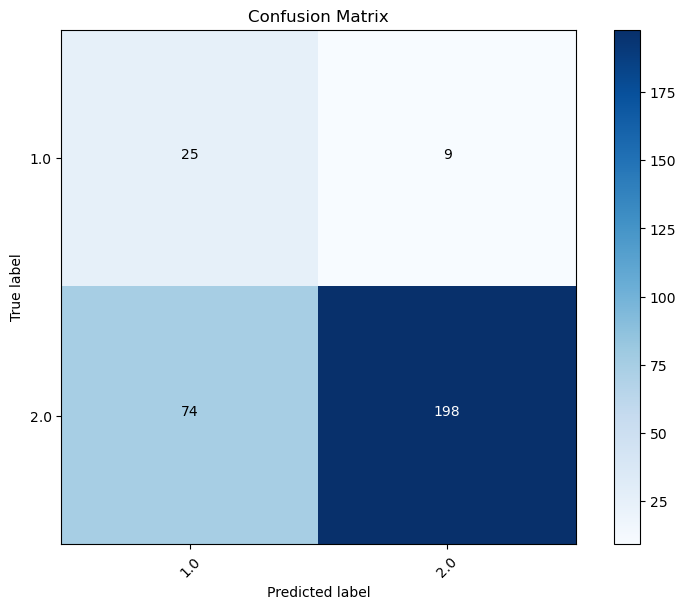

In [91]:
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(set(yTest)))  # Assuming yTest contains your classes
plt.xticks(tick_marks, set(yTest), rotation=45)
plt.yticks(tick_marks, set(yTest))

# Labeling the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [172]:
#Imbalanced dataset

people_df = pd.read_csv("NHANES_data_train.csv")
#partition data sets
trainDf, testDf = train_test_split(people_df, test_size = 0.2, random_state = None)

#get counts
MIcount = (trainDf["MI"] == 1).sum()
noMIcount = (trainDf["MI"] == 2).sum()
testMIcount = (testDf["MI"] == 1).sum()
testnoMIcount = (testDf["MI"] == 2).sum()

#Balance data sets
dirtyTrainMI_sample = trainDf[trainDf["MI"] == 1]
cleanTrainNoMISample = ((trainDf[trainDf["MI"] == 2]).dropna())
noMIcount = (cleanTrainNoMISample["MI"] == 2).sum()


cleanTrainNoMISample = cleanTrainNoMISample.sample(frac=(MIcount/noMIcount)*1.5)
    
#clean data sets
dirtyTestMI_sample = testDf[testDf["MI"] == 1]
cleanTestNoMISample = ((testDf[testDf["MI"] == 2]).dropna())

imputer = KNNImputer(n_neighbors = 11)
    
crudeCleanTrainMI = imputer.fit_transform(dirtyTrainMI_sample)
cleanTrainMI = pd.DataFrame(crudeCleanTrainMI, columns = dirtyTrainMI_sample.columns)

crudeCleanTestMI = imputer.fit_transform(dirtyTestMI_sample)
cleanTestMI = pd.DataFrame(crudeCleanTestMI, columns = dirtyTestMI_sample.columns)

#partition final samples
fTrainSample = (pd.concat([cleanTrainMI, cleanTrainNoMISample])).sample(frac=1)
fTestSample = (pd.concat([cleanTestMI, cleanTestNoMISample])).sample(frac=1)

#partition test and train
xTrain2 = fTrainSample.drop("MI", axis = 1)
yTrain = fTrainSample["MI"]
xTest = fTestSample.drop("MI", axis=1)
yTest2 = fTestSample["MI"]  # Corrected to use fTestSample

#instanciate the object
lr = LogisticRegression(random_state= 0)
scaler = StandardScaler()
pipeline = make_pipeline(scaler, lr)
pipeline.fit(xTrain2, yTrain)

#pipe it through a scalar
yPred2 = pipeline.predict(xTest)

#print results
print(accuracy_score(yTest2, yPred2))
print(classification_report(yTest2, yPred2))
cm = confusion_matrix(yTest2, yPred2)


0.7706093189964157
              precision    recall  f1-score   support

         1.0       0.23      0.59      0.33        27
         2.0       0.95      0.79      0.86       252

    accuracy                           0.77       279
   macro avg       0.59      0.69      0.60       279
weighted avg       0.88      0.77      0.81       279


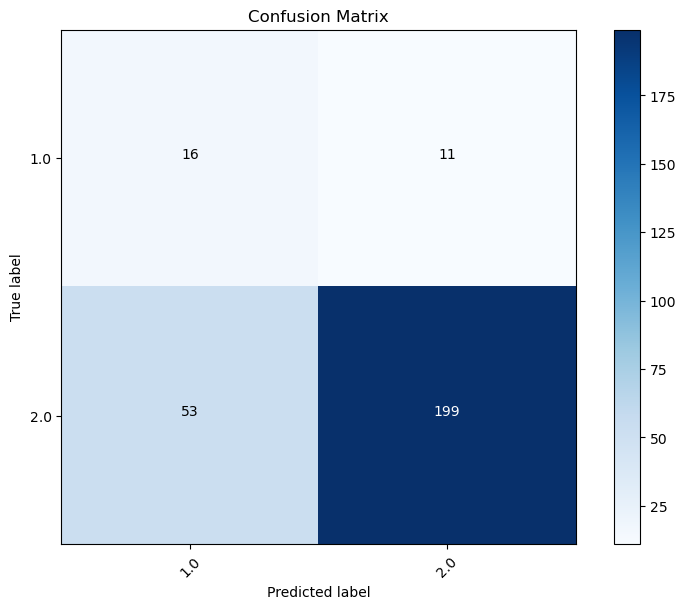

In [173]:
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(set(yTest2)))  # Assuming yTest contains your classes
plt.xticks(tick_marks, set(yTest2), rotation=45)
plt.yticks(tick_marks, set(yTest2))

# Labeling the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [190]:
#final run
people_df = pd.read_csv("NHANES_data_train.csv")
test_df = pd.read_csv("NHANES_test_data_4_students.csv")

#partition data sets
participantID = test_df["ParticipantID"]


#get counts
MIcount = (people_df["MI"] == 1).sum()
noMIcount = (people_df["MI"] == 2).sum()

#Balance data sets
dirtyTrainMI_sample = people_df[people_df["MI"] == 1]
cleanTrainNoMISample = ((people_df[people_df["MI"] == 2]).dropna())
noMIcount = (cleanTrainNoMISample["MI"] == 2).sum()


cleanTrainNoMISample = cleanTrainNoMISample.sample(frac=(MIcount/noMIcount)*1.5)
    
#clean data sets
imputer = KNNImputer(n_neighbors = 11)
    
crudeCleanTrainMI = imputer.fit_transform(dirtyTrainMI_sample)
cleanTrainMI = pd.DataFrame(crudeCleanTrainMI, columns = dirtyTrainMI_sample.columns)

crudeCleanTest = imputer.fit_transform(test_df)
cleanTestDf = pd.DataFrame(crudeCleanTest, columns = test_df.columns)

#partition final samples
fTrainSample = (pd.concat([cleanTrainMI, cleanTrainNoMISample])).sample(frac=1)

#partition test and train
xTrain2 = fTrainSample.drop("MI", axis = 1)
yTrain = fTrainSample["MI"]


#instanciate the object
lr = LogisticRegression(random_state= 0)
scaler = StandardScaler()
pipeline = make_pipeline(scaler, lr)
pipeline.fit(xTrain2, yTrain)

#pipe it through a scalar
#yPred2 = pipeline.predict(cleanTestDf)
yPred3 = pipeline.predict(cleanTestDf)

results = pd.DataFrame(yPred3, columns=["MI"])

participantID_df = participantID.to_frame(name = "ParticipantID")

final_sheet = pd.concat([participantID_df, results], axis=1)

final_sheet.to_csv("./Results/Regression/regression_pred.csv", index =False)
